<div style="text-align: center; font-size: 30px; font-weight: bold;">
    Assignment/Lab 1: Winter 2025 Group 2
    <br>***
</div>

<h1>Team members</h1>
<b>
    
- Minh Le Nguyen
- Liam Knapp
- Gautam Singh
- Gleb Ignatov

</b>
<br>

---

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Implementing and Testing the K-Nearest Neighbors (KNN) Model
</div>

## I. Objectives

<b>
    
- Set up your Python development environment.
- Get familiar with commonly used Python packages.
- Implement the KNN algorithm from scratch.
- Use your implementation to perform regression on the datasets provided in a separate file.
- Evaluate the performance of your first machine learning algorithm.
    
</b>

**Note: Intructions Details at the bottoms**

### *Formulas

<b>

1. [KNN](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#other)

2. [Linear Regression](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#linear-models)

</b>

## II. Implementation

### Step 1: Set up your Python development environment

In [1]:
pip install numpy pandas scipy matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

### Step 2: Implement the KNN Algorithm

In [3]:
class KNNRegressor:
     def __init__(self, k=3):
        self.k = k # Set the K value for the predictions
        self.TrainX = None # Place holder for training data
        self.TrainY = None # Place holder for training data
         
     def fit(self, x, y):
        # Train the algorithm for the given X and y. Where X: is the input features, y:  is the output.
         self.TrainX = np.array(x) # Set / Save the training X values
         self.TrainY = np.array(y) # Set / Save the training Y values

     def predict(self, x):
        # Predicts the target values for a given set of examples. 

        x = np.array(x) # The inputed target value to be predicted

        predictions = [] # Used to store the predicted values for each targeted value point.
         
        for targetValue in x: # Loop through each element in the targeted value to be predicted
            
            #  Step 1: Calculate the Euclidean distance for each point in the training data.
            EuclideanDistances = np.linalg.norm(self.TrainX - targetValue, axis=1)
                # Subtracts the test point (targetValue) from each point in the training dataset (self.TrainX).
                # np.linalg.norm computes the norm (distance) for each vector (row) in the matrix self.TrainX - targetValue.
                # axis=1 means you calculate the norm row-wise (along the columns) which is needed for KNN algorithm.
                # axis=0 means you calculate the norm column-wise (along the rows) which is not useful for KNN since we need the distance between points, not across features.
    
            # Step 2: Get the index's of (self.TrainX) in the training data set using the training points with the least distance.
            NearestNeighboursIndex = np.argsort(EuclideanDistances)[:self.k] 
                # Sorts the array "EuclideanDistances" in ascending order (from smallest to largest).
                # Used to find the Index of the training points with the smallest distance.
                # Only selects the k number of training points specified.

            # Step 3: Get the values for (self.TrainY) in the training dataset using the (self.TrainX) index from previous step.
            NearestNeighbours = self.TrainY[NearestNeighboursIndex]
                # Use the index from NearestNeighboursIndex to select the target values (self.TrainY) in the training data.
                # By using this, we are selecting the target values (labels) that correspond to those nearest neighbors.

            # Step 4: Average the values (labels) obtained from the previous step.
            predictions.append(np.mean(NearestNeighbours))
                # Computes the average of the target values for the nearest neighbors.
                # The resulting prediction is then appended to the predictions list.
         
        # Return the KNearestNeighbour points
        return np.array(predictions)
         
        

In [4]:
if __name__ == "__main__":
    # Training data (features and target values)
    X_train = [[1, 2], [4, 6], [3, 5], [2, 1]]
    y_train = [3, 8, 7, 2]
    
    # Test data
    X_test = [[2, 3], [3, 4]]
    
    # Initialize and train the model
    knn = KNNRegressor(k=2)
    knn.fit(X_train, y_train)
    
    # Make predictions
    predictions = knn.predict(X_test)
    print(f"Predictions: {predictions}")


Predictions: [2.5 7.5]


### Step 3: Load the Dataset and Train the model

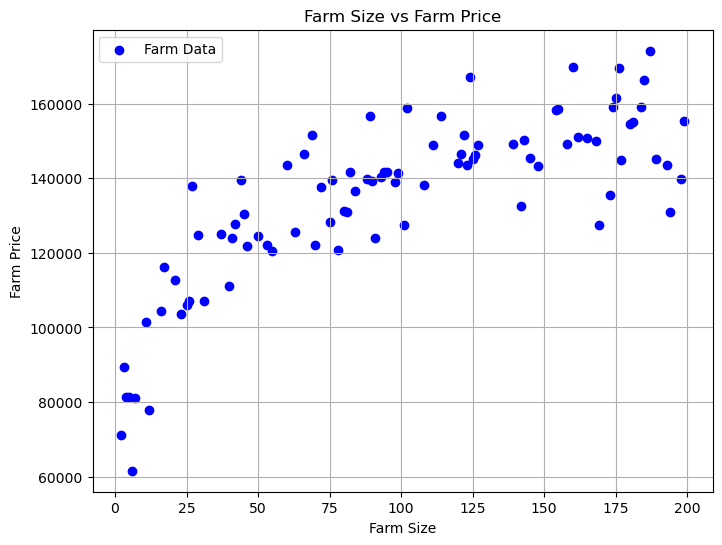

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
FarmData = pd.read_csv("Dataset/training_dataset_lab-1.csv")

# Separate the data into features (X) and target values (Y)
FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)  # Convert to numpy array and reshape for the model
FarmPriceData = FarmData["FarmPrice"].values

# Instantiate the KNNRegressor class
knn_model = KNNRegressor(k=1)

# Fit the model with the training data
knn_model.fit(FarmSizeData, FarmPriceData)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Farm Data')

# Adding labels and title
plt.xlabel('Farm Size')
plt.ylabel('Farm Price')
plt.title('Farm Size vs Farm Price')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


### Step 4: Test And Evaluate the Model

Predicted Farm Prices: [125095. 144034. 158273. 143257. 169908. 104476. 141471. 145191. 149242.
 139679. 135531.  71107. 121987. 148953. 107156. 128342. 174151. 141723.
 148956.  81007. 139081. 146374. 125095. 120489. 125095. 158786. 124820.
 124450. 145398. 101464.]
Actual Farm Prices: [106926 150154 167490 137124 140769  91182 141781 154987 136817 147294
 149559  53218 137113 134072 116212 135526 160664 147969 135238  86989
 129021 130011 138212 141464 117701 142873 113186 119264 129554 101042]


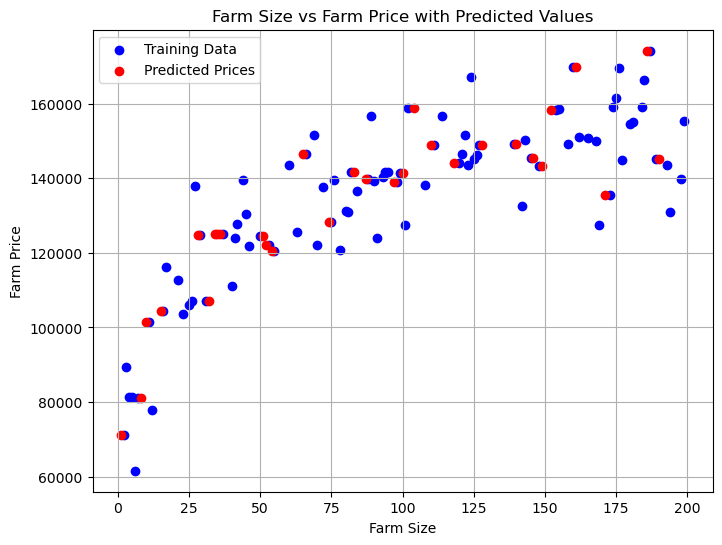

The calculated Root Mean Square Error (RMSE) is: 13002.847366378386


In [ ]:
# MODEL RUN WITH k = 1

# Load the validation dataset
ValidationData = pd.read_csv("Dataset/validation_dataset_lab-1.csv")

# Separate the validation data into features (X) and target values (Y)
ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
ActualFarmPrice = ValidationData["FarmPrice"].values

# Predict FarmPrices using the trained model
PredictedFarmPrice = knn_model.predict(ValidationFarmSize)

# Compare predicted vs actual values
print("Predicted Farm Prices:", PredictedFarmPrice)
print("Actual Farm Prices:", ActualFarmPrice)

# Create a scatter plot for the original training data (blue)
plt.figure(figsize=(8, 6))
plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Training Data')

# Scatter plot for the predicted farm prices (red)
plt.scatter(ValidationFarmSize, PredictedFarmPrice, color='red', label='Predicted Prices')

# Adding labels and title
plt.xlabel('Farm Size')
plt.ylabel('Farm Price')
plt.title('Farm Size vs Farm Price with Predicted Values')

# Displaying the legend and the plot
plt.legend()
plt.grid(True)
plt.show()



# Calculate the mean squared error (MSE) by taking the mean of the squared differences
meanSquaredError = ((PredictedFarmPrice - ActualFarmPrice) ** 2).mean()

# Calculate the RMSE by taking the square root of the MSE
rmse = np.sqrt(meanSquaredError)

# Print the RMSE
print("The calculated Root Mean Square Error (RMSE) is: " + str(rmse))

In [7]:
#FIND THE BEST RMSE

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
FarmData = pd.read_csv("Dataset/training_dataset_lab-1.csv")

# Separate the data into features (X) and target values (Y)
FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)  # Convert to numpy array and reshape for the model
FarmPriceData = FarmData["FarmPrice"].values

 # Load the validation dataset
ValidationData = pd.read_csv("Dataset/validation_dataset_lab-1.csv")

# Separate the validation data into features (X) and target values (Y)
ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
ActualFarmPrice = ValidationData["FarmPrice"].values

# Initialize list to store RMSE for each k value
BestRMSE = []

# Iterate over a range of k values (1 to 20, for example)
for z in range(1, 21):
    # Instantiate the KNNRegressor class
    knn_model = KNNRegressor(k=z)

    # Fit the model with the training data
    knn_model.fit(FarmSizeData, FarmPriceData)

    # Predict FarmPrices using the trained model
    PredictedFarmPrice = knn_model.predict(ValidationFarmSize)

    # Calculate the mean squared error (MSE)
    meanSquaredError = ((PredictedFarmPrice - ActualFarmPrice) ** 2).mean()

    # Calculate the RMSE by taking the square root of the MSE
    rmse = np.sqrt(meanSquaredError)

    # Store the RMSE value for this k
    BestRMSE.append((z, rmse))

# Find the k with the lowest RMSE
BestK, BestRMSEValue = min(BestRMSE, key=lambda x: x[1])

# Print the best RMSE and corresponding k value
print(f"The best k value is {BestK} with an RMSE of {BestRMSEValue}")



The best k value is 8 with an RMSE of 10655.075182356371


Predicted Farm Prices: [120632.25  150395.125 150875.125 148291.875 151866.     94857.375
 141077.875 151812.25  146749.625 138621.25  149836.875  80641.5
 128768.125 145229.75  117929.625 132777.625 153599.75  137090.75
 149095.875  80641.5   139325.    134445.    124705.    128480.125
 124705.    142156.375 115539.875 128768.125 148291.875  88181.5  ]
Actual Farm Prices: [106926 150154 167490 137124 140769  91182 141781 154987 136817 147294
 149559  53218 137113 134072 116212 135526 160664 147969 135238  86989
 129021 130011 138212 141464 117701 142873 113186 119264 129554 101042]


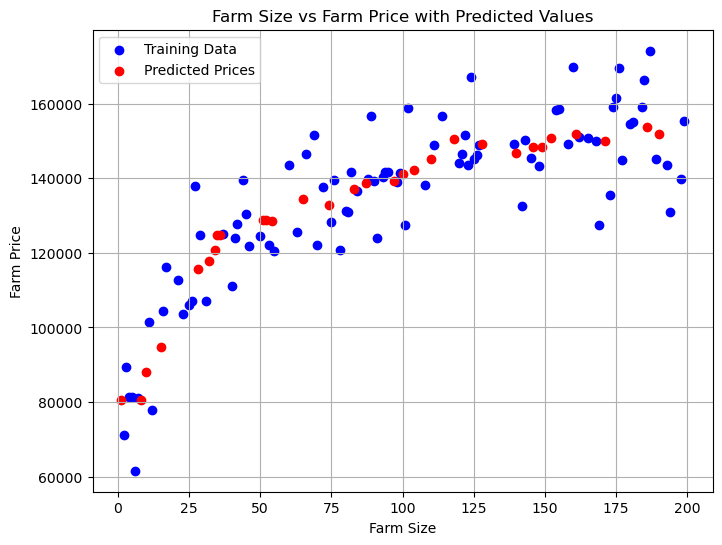

The calculated Root Mean Square Error (RMSE) is: 10655.075182356371


In [ ]:
# MODEL RUN WITH k = 8 which provides the best RMSE

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
FarmData = pd.read_csv("Dataset/training_dataset_lab-1.csv")

# Separate the data into features (X) and target values (Y)
FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)  # Convert to numpy array and reshape for the model
FarmPriceData = FarmData["FarmPrice"].values

# Instantiate the KNNRegressor class
knn_model = KNNRegressor(k=8)

# Fit the model with the training data
knn_model.fit(FarmSizeData, FarmPriceData)


# Load the validation dataset
ValidationData = pd.read_csv("Dataset/validation_dataset_lab-1.csv")

# Separate the validation data into features (X) and target values (Y)
ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
ActualFarmPrice = ValidationData["FarmPrice"].values

# Predict FarmPrices using the trained model
PredictedFarmPrice = knn_model.predict(ValidationFarmSize)

# Compare predicted vs actual values
print("Predicted Farm Prices:", PredictedFarmPrice)
print("Actual Farm Prices:", ActualFarmPrice)

# Create a scatter plot for the original training data (blue)
plt.figure(figsize=(8, 6))
plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Training Data')

# Scatter plot for the predicted farm prices (red)
plt.scatter(ValidationFarmSize, PredictedFarmPrice, color='red', label='Predicted Prices')

# Adding labels and title
plt.xlabel('Farm Size')
plt.ylabel('Farm Price')
plt.title('Farm Size vs Farm Price with Predicted Values')

# Displaying the legend and the plot
plt.legend()
plt.grid(True)
plt.show()


# Calculate the mean squared error (MSE) by taking the mean of the squared differences
meanSquaredError = ((PredictedFarmPrice - ActualFarmPrice) ** 2).mean()

# Calculate the RMSE by taking the square root of the MSE
rmse = np.sqrt(meanSquaredError)

# Print the RMSE
print("The calculated Root Mean Square Error (RMSE) is: " + str(rmse))

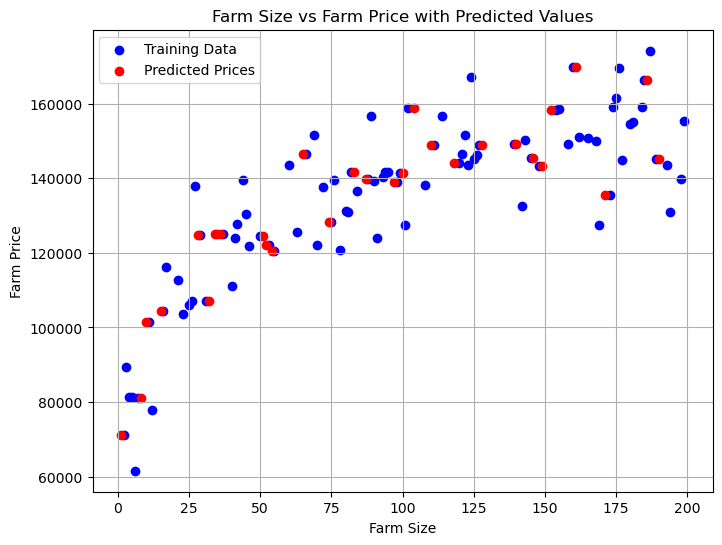

In [ ]:
# Compare the result of your KNNRegressor with the result of KNeighborsRegressor from scikit-learn. Use visualizations to gain better insights into the results. 
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
FarmData = pd.read_csv("Dataset/training_dataset_lab-1.csv")

# Separate the data into features (X) and target values (Y)
FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)  # Convert to numpy array and reshape for the model
FarmPriceData = FarmData["FarmPrice"].values

# Load the validation dataset
ValidationData = pd.read_csv("Dataset/validation_dataset_lab-1.csv")

# Separate the validation data into features (X) and target values (Y)
ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
ActualFarmPrice = ValidationData["FarmPrice"].values

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(FarmSizeData, FarmPriceData)

neigh.predict(ValidationFarmSize)


# Create a scatter plot for the original training data (blue)
plt.figure(figsize=(8, 6))
plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Training Data')

# Scatter plot for the predicted farm prices (red)
plt.scatter(ValidationFarmSize, neigh.predict(ValidationFarmSize), color='red', label='Predicted Prices')

# Adding labels and title
plt.xlabel('Farm Size')
plt.ylabel('Farm Price')
plt.title('Farm Size vs Farm Price with Predicted Values')

# Displaying the legend and the plot
plt.legend()
plt.grid(True)
plt.show()


### Step 5: Answer the following questions:

<b>

- How does the choice of k affect the model's performance?
- What challenges did you face while implementing the KNNRegressor algorithm?
- How does the KNNRegressor algorithm handle noisy data?

</b>

1. The value of K has a large impact on the model's output, a small K value makes the model highly sensitive to each data point which may lead to overfitting and can be thrown off by noise. A large K value smoothens out the model by reducing the impact of noise but could lead to undefitting if the model is too large, they can also make the model less flexible by ignoring smaller patterns. A K value with the lowest RMSE is the perfect tradeoff between under and over fitting and results in the best performance.

2. 

3. The KNNRegressor predicts the target value by averaging the target values of K nearest neighbors, the larger K is the more noise is reduced because the prediction is based on multiple neighbors rather than a single data point. If a dataset has a very large amount of noise then even a large K value will reduce the impact, in such cases we should preprocess the data by smoothing the values.

---

## III. Instructions

### Step 1: Set up your Python development environment

<b>

1. Download and install Anaconda distribution platform
2. Create a virtual environment and name it “aimlcourse”
3. Install the following python packages:
    - Data Manipulation and Analysis:
        - NumPy: For numerical computing and handling multi-dimensional arrays.
        - Pandas: For data manipulation and analysis with easy-to-use data structures like DataFrames.
        - SciPy: A library for scientific computing with modules for optimization, integration, interpolation, and more.
    - Data Visualization:
        - Matplotlib: For creating static, interactive, and animated visualizations.
    - Core Machine Learning Libraries:
        - scikit-learn: A powerful library for traditional machine learning algorithms, preprocessing, and evaluation metrics. Includes tools for regression, classification, clustering, and dimensionality reduction.

</b>

---

### Step 2: Implement the KNN Algorithm (3 pts.)

#### Implement the KNN algorithm from scratch without using any machine learning libraries like `scikit-learn` for the core functionality. Follow these steps:

<b>

1. Create a KNNRegressor class with the following methods:
    - fit (X, y): Train the algorithm for the given X and y. Where X : is the input features, y: is the output.
    - predict (X): Predicts the target values for a given set of examples.
    - You should add other methods or modify the input arguments for the methods above as needed.
2. In your implementation, you must set the Euclidean distance formula as the default method to compute distances between points.
3. Return the average target value of the k nearest neighbors for regression.

</b>

---

### Step 3: Load the Dataset (0.5 pt.)
#### Files named training_dataset_lab-1.csv and validation_dataset_lab-1.csv containing the datasets. Perform the following:

<b>

1. Load the data from the provided csv files.
2. Ensure you understand the dataset before proceeding with your implementation. Use visualizations to gain better insights.
3. Preprocess the data if necessary (e.g., handle missing values).

</b>

---

### Step 4: Train the KNN Model (0.5 pt.)

<b>

1. Initialize your KNNRegressor model with a value of k = 1.
2. Train the KNNRegressor model using the `fit` method with the provided training dataset.

</b>

---

### Step 5: Test and Evaluate the Model (3 pts.)

<b>

1. Use the `predict` method to predict target values for the validation dataset.
2. Calculate the Root Mean Squared Error (RMSE) of your model.
3. Experiment with different values of `k` and record the RMSE for each k and select the best k.
4. Compare the nearest neighbour model (k =1) with the model which is corresponding to the best ‘k’ from step3. Use visualizations to gain better insights into the results.
5. Compare the result of your KNNRegressor with the result of KNeighborsRegressor from scikit-learn. Use visualizations to gain better insights into the results.
   
</b>

---

### Step 6: Answer the following questions in your Jupyter notebook: (1.5 pts.)

<b>

1. How does the choice of k affect the model's performance?
2. What challenges did you face while implementing the KNNRegressor algorithm?
3. How does the KNNRegressor algorithm handle noisy data?
   
</b>